# Customer Churn Analysis

In [1]:
# impoting all the required library
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv(r"C:\Users\Ashwini\Documents\Telecom_customer_churn.csv")

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
data.sample(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6284,2985-FMWYF,Female,0,No,No,23,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.50,2341.55,No
6883,2133-TSRRM,Female,0,No,Yes,34,Yes,No,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),105.35,3688.6,No
3193,1407-DIGZV,Female,0,Yes,Yes,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.10,52,No
4666,8780-RSYYU,Female,0,No,No,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),19.20,532.1,No
4960,7480-QNVZJ,Male,1,No,No,50,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.70,4816.7,Yes
993,9108-EQPNQ,Female,0,Yes,Yes,10,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),26.10,225.55,No
4927,4774-HHGGS,Male,0,Yes,No,30,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.05,637.55,No
1372,9793-WECQC,Male,0,No,No,23,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Mailed check,95.30,2192.9,No
4124,3452-GWUIN,Female,1,Yes,No,19,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.95,1760.25,No
407,0111-KLBQG,Male,1,Yes,Yes,32,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,93.95,2861.45,No


In [6]:
data.shape

(7043, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data Description

* Data is having 7043 entries, 0 to 7042

* Data having 21 columns and 7043 Rows

* All the columns are having 7043 Non-Null value, means data is not having any null values.

* Out of 21 columns we have 1 float, 2 int64 and 18 Object type values.

* memory usage: 1.1+ MB
* Here we can see Totalcharges is object type, but the values are float. It might be possible we have space in isnsted of value we will check where data having space or 

# Attribute Information:

# Checking null values

In [10]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

* no null value in the data

In [11]:
data.duplicated().sum()

0

* We also not having any duplicated value in the data

# Checkign any space values filled in the columns

In [12]:
data.isin([" "]).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* Data is gaving 11 value which are filled with space character.

In [13]:
data.replace(to_replace=" ", value=np.nan, inplace= True)

In [14]:
data =data.dropna()

In [15]:
data.drop('customerID', axis=1, inplace= True)

In [16]:
data['TotalCharges']=data.TotalCharges.astype(float)

In [17]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


* Here we can see a strong correlation of tenure, monthlycharges with TotalCharges.

# Data analysis and Visualization

Univariate Analysis

Here We will analyse the distribution of our data columns.

before analysing lets divide dataset in categorical and numerical columns.

In [19]:
cat_feature= data.select_dtypes(include=[np.object])

* Lets first analyse the churn percentage, we will analyse this using pi chart.

Text(0.5, 1.0, 'Percentage of Customer Churn ')

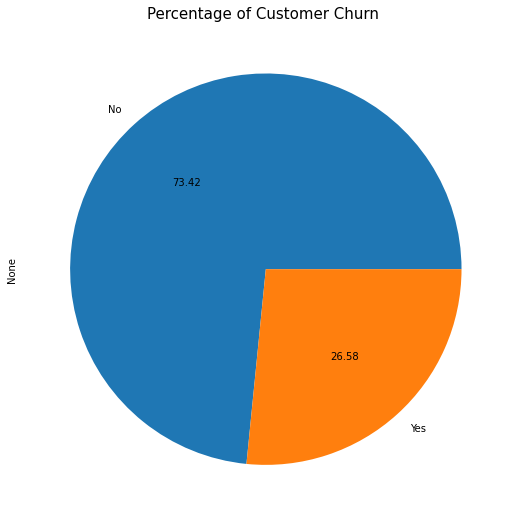

In [20]:
plt.figure(figsize=(15,9))
cat_feature.groupby('Churn').size().plot(kind='pie', autopct='%.2f')
plt.title("Percentage of Customer Churn ", fontsize =15)

* here we can see 26.58 percentage of Customer are not satisfied with the company and dont wanted to contineu with company.

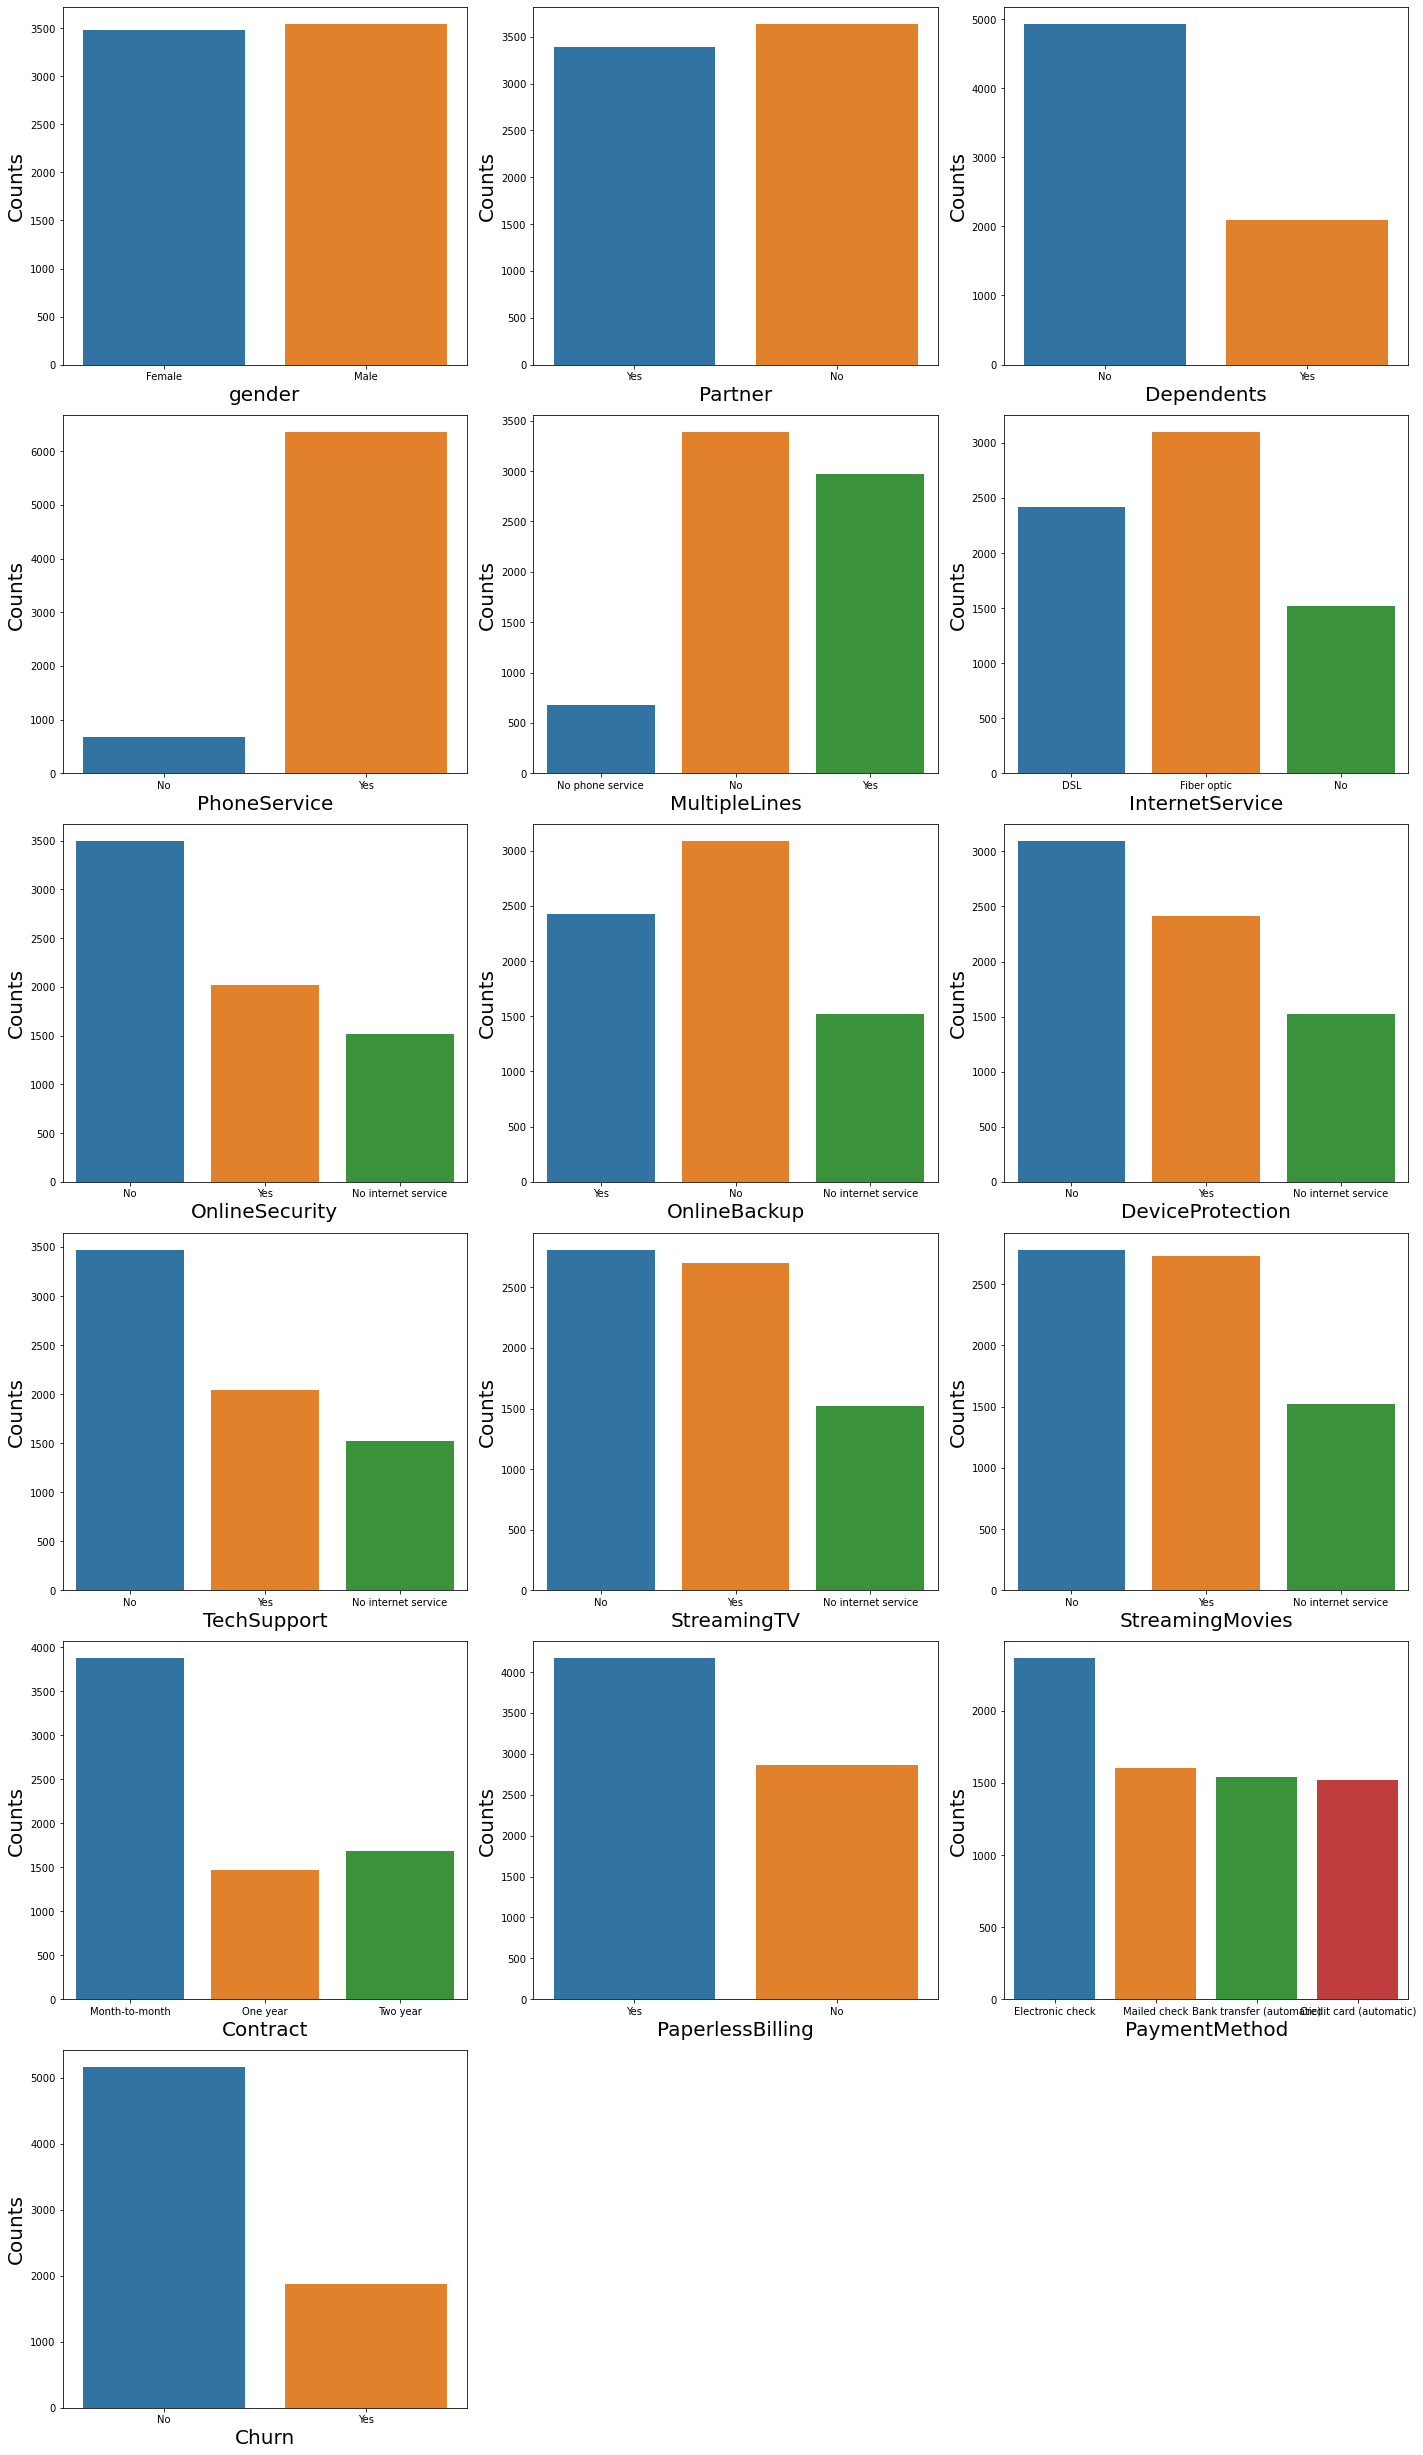

In [21]:
plt.figure(figsize=(20,45))
plotnumber= 1

for column in cat_feature:
    if plotnumber<=17:
        ax= plt.subplot(8,3, plotnumber)
        sns.countplot(cat_feature[column])
        
        plt.xlabel(column, fontsize= 20)
        plt.ylabel('Counts', fontsize= 20)
    plotnumber+=1
plt.tight_layout()

* Gender : No of males and females are almost equal
    
* Partner: Count for having partner is less as compare to without partner
    
* Dependents : Near about 70 percent customers are not having any Dependent
    
* PhoneService : More than 90 percent customers have PhoneService
    
* MultipleLines : More than 48 percent customer not having multiple lines
    
* InternetService : For More than 44 percent customers internet service provider is Fiber Optics
    
* OnlineSecurity: 49 percent customers are not having Online Security
    
* OnlineBackup: More than 43 customers Not having online backup
    
* DeviceProtection : More than 43 customers are not having Device Protection
    
* TechSupport: 49 percent customers are not having any technical support
    
* StreamingTV : The count for Streaming TV and Not Streaming TV are almost same
    
* StreamingMovies : The count for Streaming Movies and Not Streaming Movies are almost same
    
* Contract : More than 55 percent of the cutmores are having month-to-month contract
    
* PaperlessBilling : we can see more than 59 percent of the customers are using PaperlessBilling
    
* PaperlessBilling : Most of the customers are using Electronic check
    
* Churn : 26 percent customer out 100 are churned.

In [22]:
num_feature= data.select_dtypes(include=[np.number])

plt.figure(figsize=(15,9))
num_feature.groupby('SeniorCitizen').size().plot(kind='pie', autopct='%.2f')
plt.title("Percentage SeniorCitizen", fontsize =15)

Text(0.5, 1.0, 'Percentage SeniorCitizen')

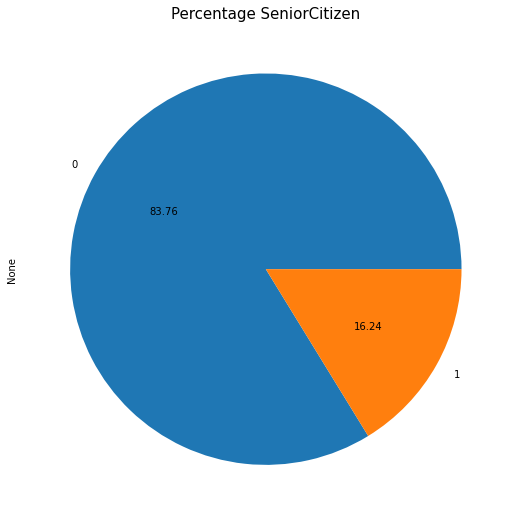

In [24]:
plt.figure(figsize=(15,9))
num_feature.groupby('SeniorCitizen').size().plot(kind='pie', autopct='%.2f')
plt.title("Percentage SeniorCitizen", fontsize =15)

* 83.76 percent of customers are not senior Citizen

Text(0.5, 1.0, 'tenure')

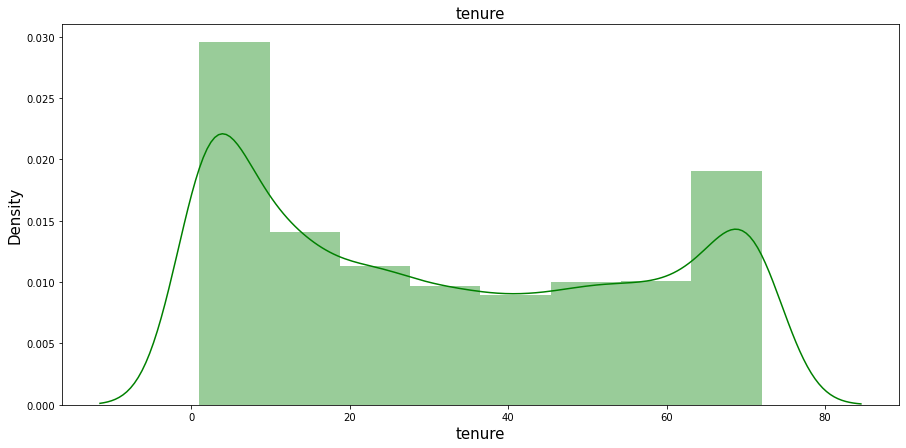

In [25]:
plt.figure(figsize=(15,7))
sns.distplot(num_feature['tenure'], bins= 8, color='g')
plt.xlabel('tenure', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('tenure', fontsize=15)

* Here we can see the probablity to have tenure 0-10 and more than 60 is more.

Text(0.5, 1.0, 'MonthlyCharges')

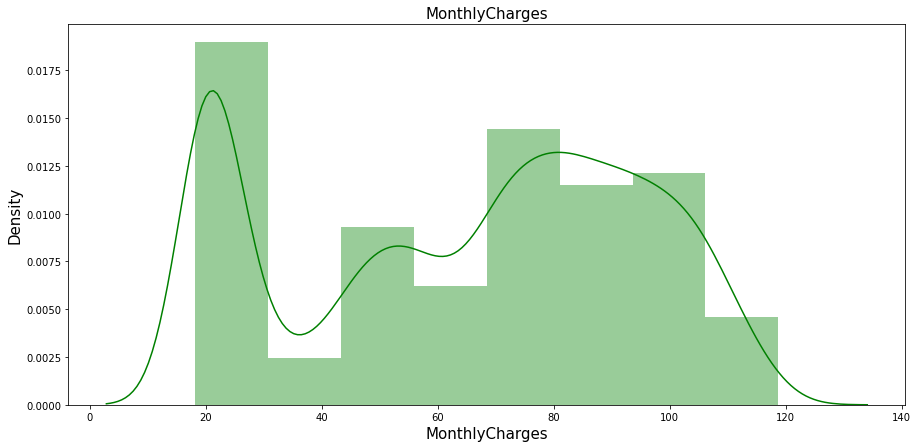

In [26]:
plt.figure(figsize=(15,7))
sns.distplot(num_feature['MonthlyCharges'], bins= 8, color='g')
plt.xlabel('MonthlyCharges', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('MonthlyCharges', fontsize=15)

* Chance of customers having monthly cahrge in the range of 70 to 100, is more as compare to other charges.

Text(0.5, 1.0, 'TotalCharges')

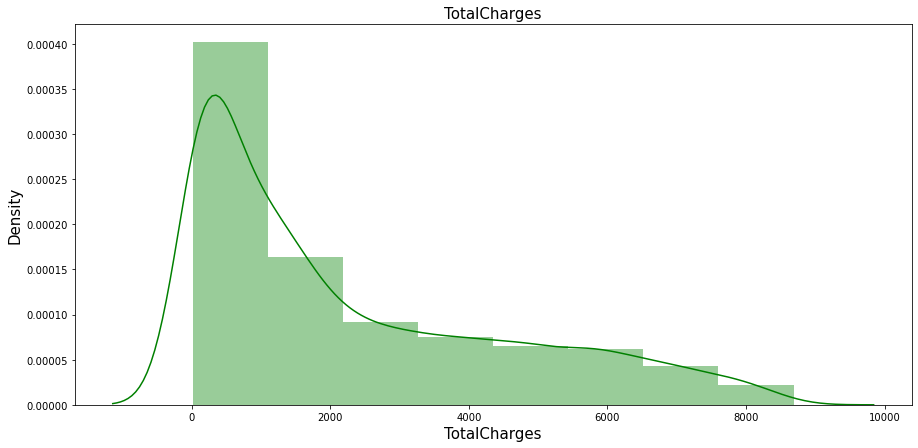

In [27]:
plt.figure(figsize=(15,7))
sns.distplot(num_feature['TotalCharges'], bins= 8, color='g')
plt.xlabel('TotalCharges', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('TotalCharges', fontsize=15)

* Here we can see skewness present in the Total charge column, customers in the range 0 to 2000 are more.

# Bivariate analysis

Here we analyse our feature columns with respect to churn which our target variable.

In [28]:
for col in cat_feature:
    print('\n%s column: '%col)
    print(cat_feature[col].value_counts(),'\n'),
    print('='*30)


gender column: 
Male      3549
Female    3483
Name: gender, dtype: int64 


Partner column: 
No     3639
Yes    3393
Name: Partner, dtype: int64 


Dependents column: 
No     4933
Yes    2099
Name: Dependents, dtype: int64 


PhoneService column: 
Yes    6352
No      680
Name: PhoneService, dtype: int64 


MultipleLines column: 
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 


InternetService column: 
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 


OnlineSecurity column: 
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 


OnlineBackup column: 
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64 


DeviceProtection column: 
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int

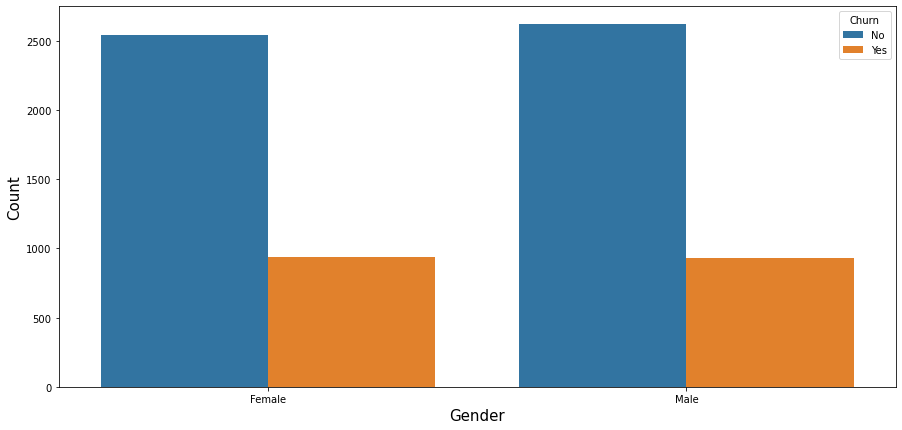

In [29]:
plt.figure(figsize=(15,7))
sns.countplot(data['gender'], hue='Churn', data= data)
plt.xlabel('Gender', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

* Male and female both are equalily having chance of churn.

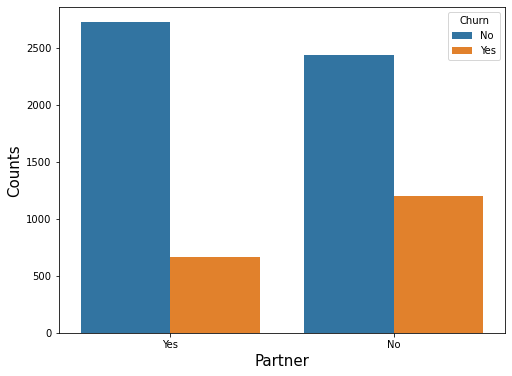

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Partner', data= cat_feature, hue='Churn')
plt.xlabel('Partner', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

* Here we can see the customers not having partners are more likely to churn.

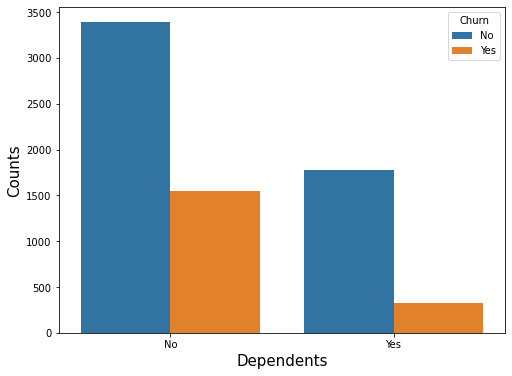

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Dependents', data= cat_feature, hue='Churn')
plt.xlabel('Dependents', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

* Churn for customers not having any dependent is more as compare to customers having dependent.

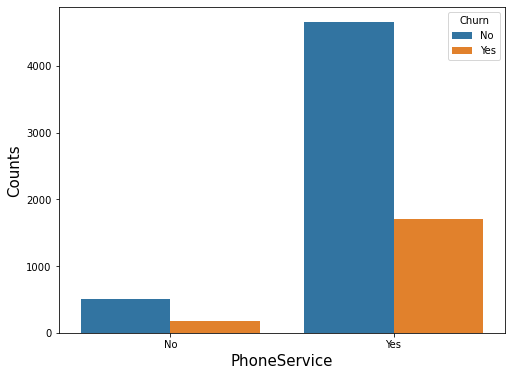

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PhoneService', data= cat_feature, hue='Churn')
plt.xlabel('PhoneService', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

* Customers having phone service are more likely to churn

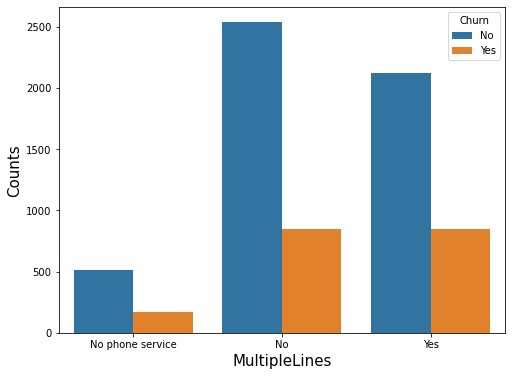

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='MultipleLines', data= cat_feature, hue='Churn')
plt.xlabel('MultipleLines', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

* Customers having multiple lines are more likely to churn.

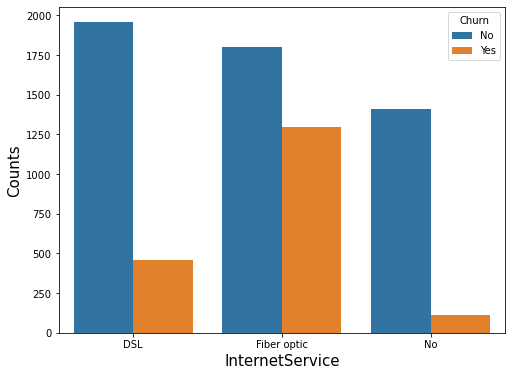

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', data= cat_feature, hue='Churn')
plt.xlabel('InternetService', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

* Customers option for fiber optics internet service are more likely to churn.

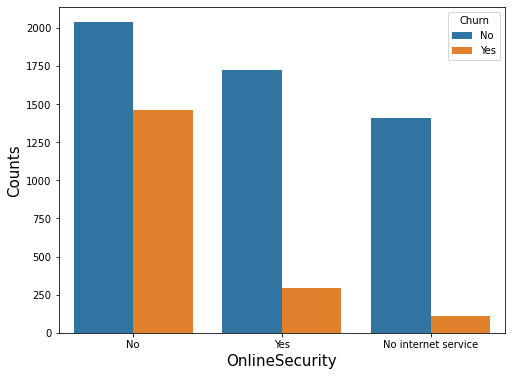

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OnlineSecurity', data= cat_feature, hue='Churn')
plt.xlabel('OnlineSecurity', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

* Customers not having Online security are more likely, to churn.

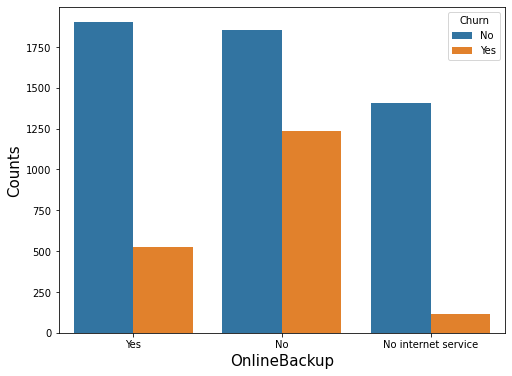

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OnlineBackup', data= cat_feature, hue='Churn')
plt.xlabel('OnlineBackup', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

* Customers not having online backup are more likely to churn.

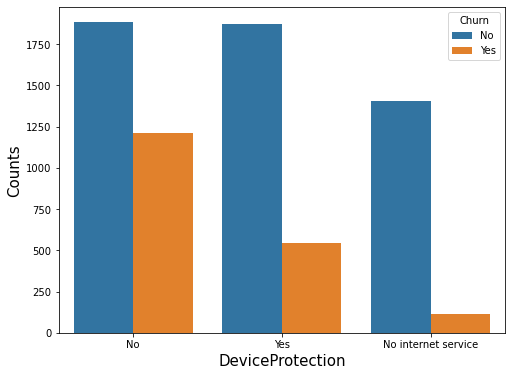

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='DeviceProtection', data= cat_feature, hue='Churn')
plt.xlabel('DeviceProtection', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()


* Customers not having Device Protection are more likly to churn.

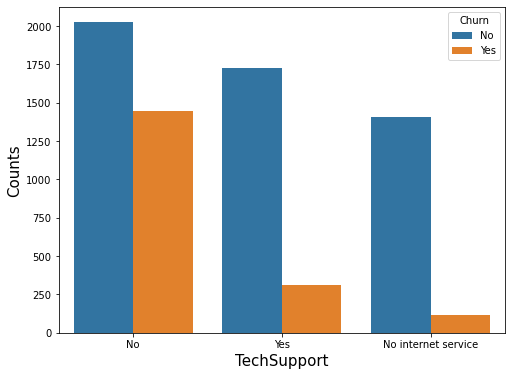

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='TechSupport', data= cat_feature, hue='Churn')
plt.xlabel('TechSupport', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

* Customers without any Technical support are more likely to churn

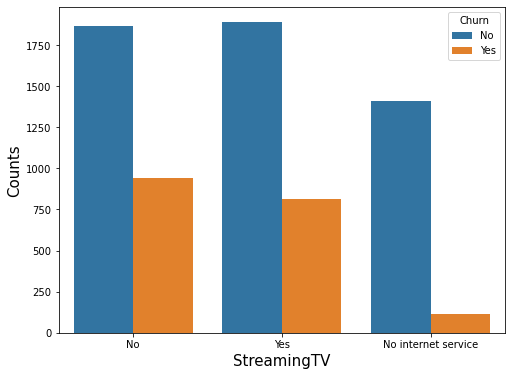

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='StreamingTV', data= cat_feature, hue='Churn')
plt.xlabel('StreamingTV', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

* Customers not having Streaming TV are more likely to churn.

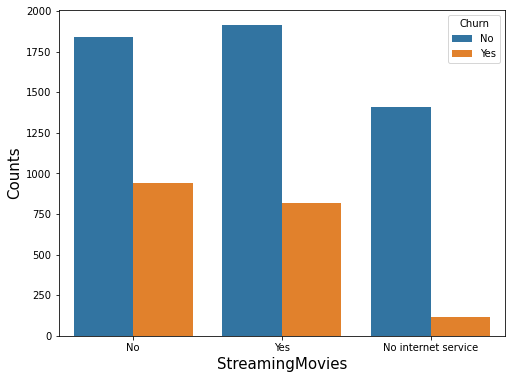

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x='StreamingMovies', data= cat_feature, hue='Churn')
plt.xlabel('StreamingMovies', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

* Customers not having Streaming Movies are more likely to churn.

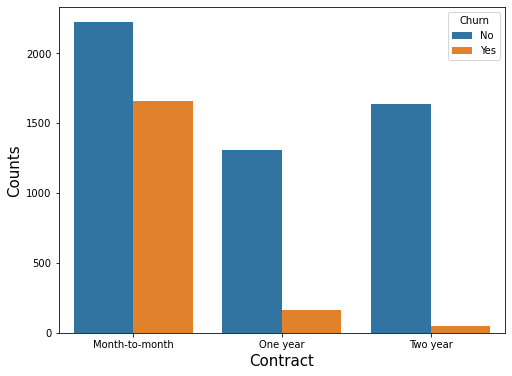

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', data= cat_feature, hue='Churn')
plt.xlabel('Contract', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

* Customers having Month to month Contract are more likely to churn.

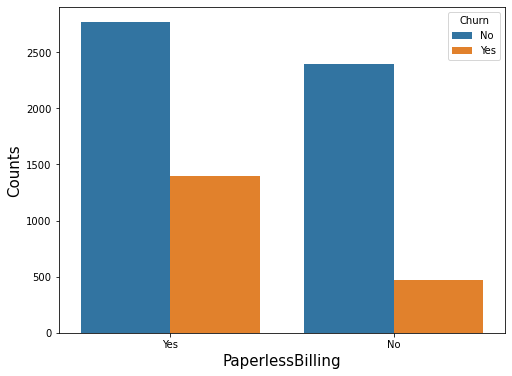

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PaperlessBilling', data= cat_feature, hue='Churn')
plt.xlabel('PaperlessBilling', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

* Customers having Paperless Billing are more likely to churn.

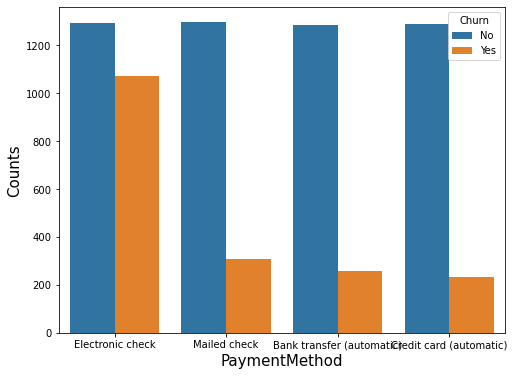

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentMethod', data= cat_feature, hue='Churn')
plt.xlabel('PaymentMethod', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

* Customers having Electronucs Payment method are more likely to churn.

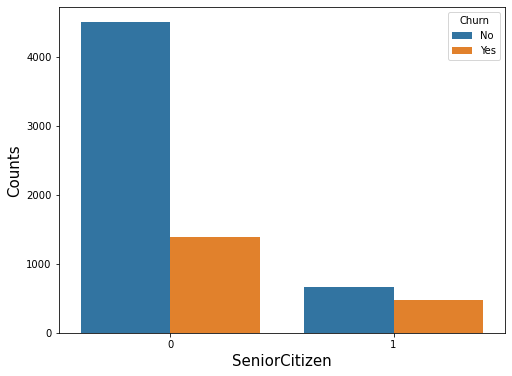

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', data= data, hue='Churn')
plt.xlabel('SeniorCitizen', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

* CUstomers who are not Senior Citizen are more likely to churn.

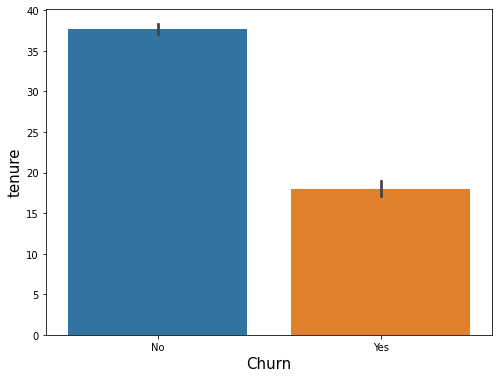

In [45]:
plt.figure(figsize=(8, 6))
sns.barplot(y='tenure', x='Churn', data= data)
plt.xlabel('Churn', fontsize=15)
plt.ylabel('tenure', fontsize=15)
plt.show()

* Bar Plot indiactes Higher the tenure Chance of churn is less.

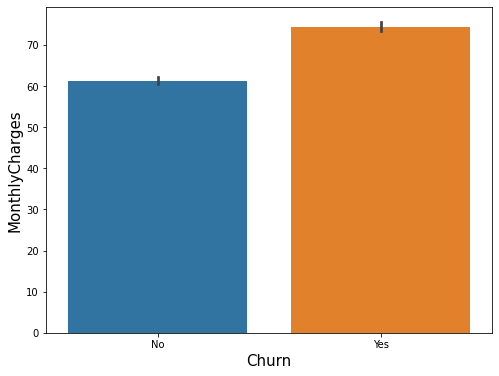

In [46]:
plt.figure(figsize=(8, 6))
sns.barplot(y='MonthlyCharges', x='Churn', data= data)
plt.xlabel('Churn', fontsize=15)
plt.ylabel('MonthlyCharges', fontsize=15)
plt.show()

* Higher the monthly charges Higher the chance to Churn.

# Multivariate Analysis

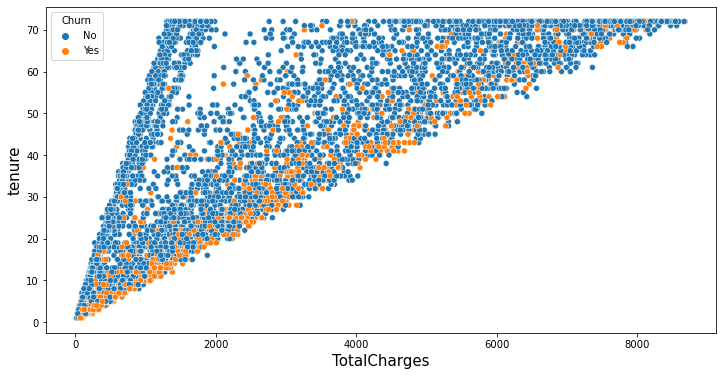

In [47]:
plt.figure(figsize=(12,6))
sns.scatterplot(data['TotalCharges'], data['tenure'], hue='Churn', data=data)
plt.xlabel('TotalCharges', fontsize=15)
plt.ylabel('tenure', fontsize=15)
plt.show()

* Here we can see as the tenure and toatl charge increase, chance of churn is less.

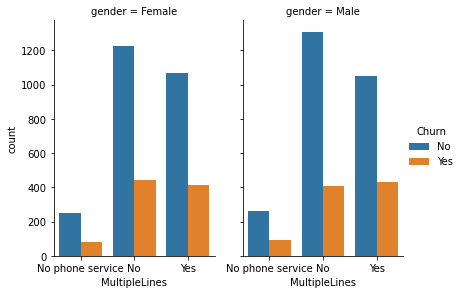

In [48]:
sns.catplot(x="MultipleLines", hue="Churn", col="gender",data=data, kind="count",height=4, aspect=.7)

* Churn for male and female are same in Multiline survice.

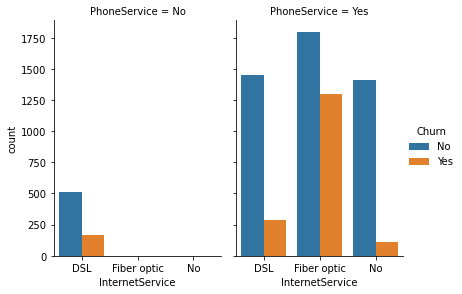

In [49]:
sns.catplot(x="InternetService", hue="Churn", col="PhoneService",data=data, kind="count",height=4, aspect=.7)

* Here we can see pepole using phine service also use internet service,
* And Customer with Fiber Optics Internet Service are more likely to Churn.

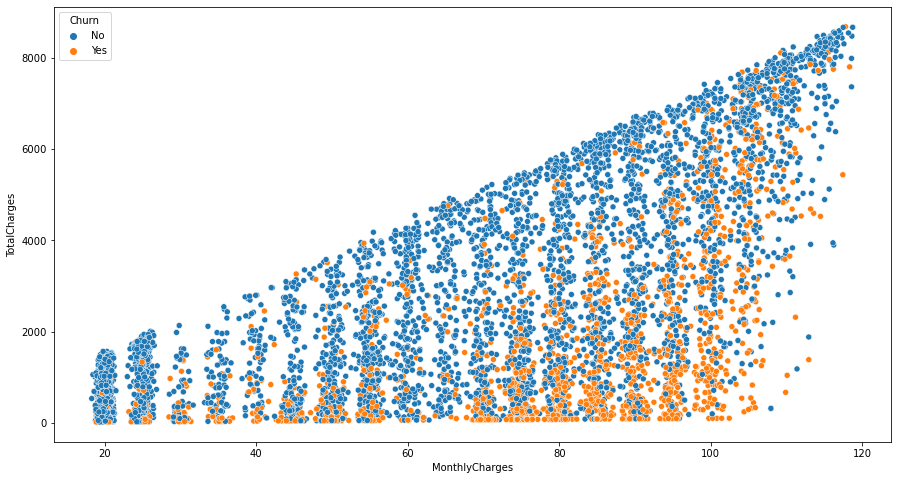

In [51]:
plt.figure(figsize= (15,8))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges',hue='Churn', data=data);

* Here we can see with increase in monthly charge and at low values of total charges churn is more likely to happen.

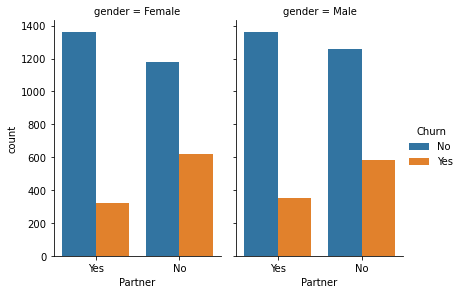

In [52]:
sns.catplot(x="Partner", hue="Churn", col="gender",data=data, kind="count",height=4, aspect=.7)

* Here we can say Male and female customers having no partner are more likely to churm.

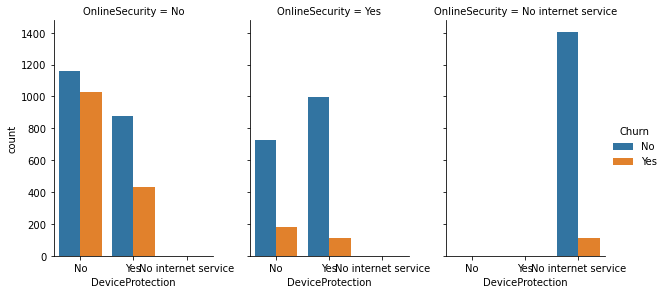

In [53]:
sns.catplot(x="DeviceProtection", hue="Churn", col="OnlineSecurity",data=data, kind="count",height=4, aspect=.7)

* Here we can see Customers not having Online security and device protection , are more likely to churn.

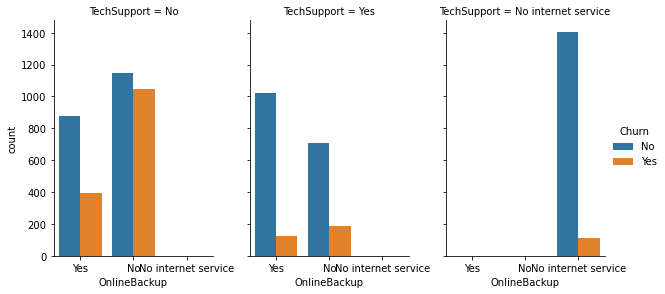

In [54]:
sns.catplot(x="OnlineBackup", hue="Churn", col="TechSupport", data=data, kind="count",height=4, aspect=.7)

* Here we can see customers with no online backup and without any technical support are more likly to churn.

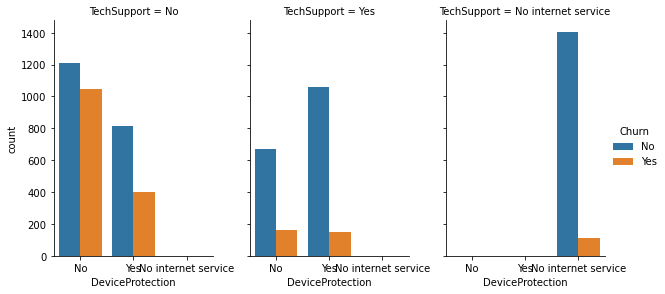

In [55]:
sns.catplot(x="DeviceProtection", hue="Churn", col="TechSupport", data=data, kind="count",height=4, aspect=.7)

* Customers without any device Protection and Techsupport are more likely to churn.

* Pepole with device protection and witout tech support are also more likely to churn.

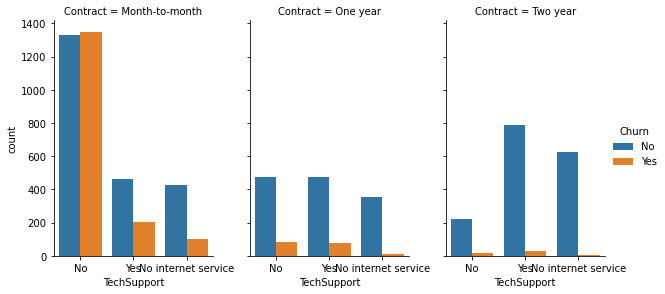

In [56]:
sns.catplot(x="TechSupport", hue="Churn", col="Contract", data=data, kind="count",height=4, aspect=.7)

* Here we can see customers with monthly contract and without any technical support are more likely to Churn.
\
* we can also say that for month to month contract, technical support is less.

* Due to less technical support Customers are more likely to churn.

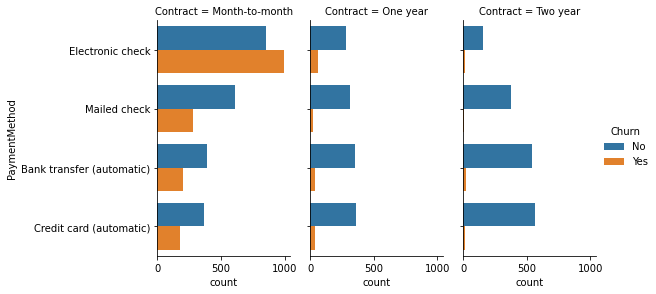

In [57]:
sns.catplot(y="PaymentMethod", hue="Churn", col="Contract", data=data, kind="count",height=4, aspect=.7)

* Customers with month to month contract and using Electronics check method for payment are more likely to Churn.

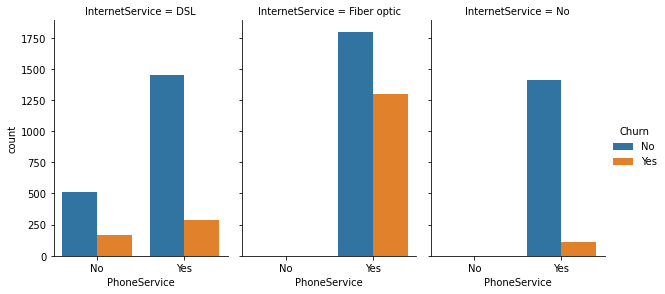

In [58]:
sns.catplot(x="PhoneService", hue="Churn", col="InternetService", data=data, kind="count",height=4, aspect=.7)

* Customers with Phone service and Internet as Fiber optics are more likely to churn.

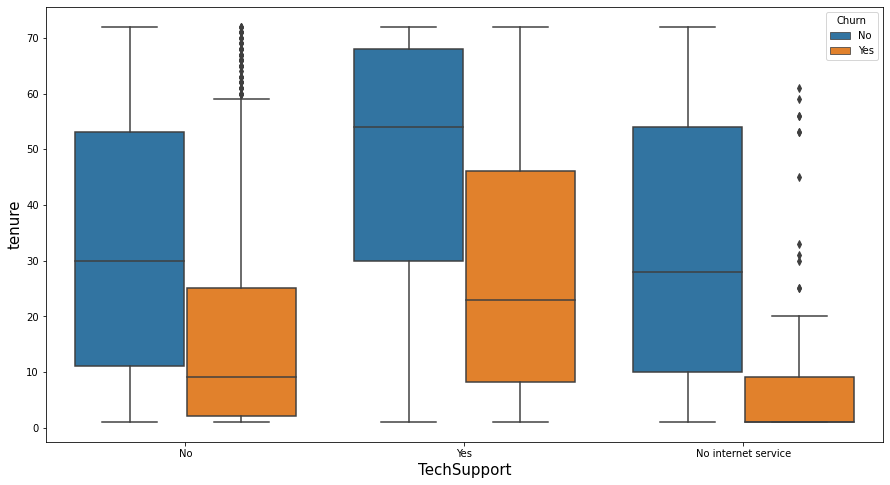

In [59]:
plt.figure(figsize=(15, 8))
sns.boxplot(y='tenure', x='TechSupport',hue='Churn' ,data= data)
plt.xlabel('TechSupport', fontsize=15)
plt.ylabel('tenure', fontsize=15)
plt.show()

* From Box plot we can see without any tech support the tennure is less and there is high chances of churn at less tenure.

* Customers opted for techsupport are more likely to stay with the company.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

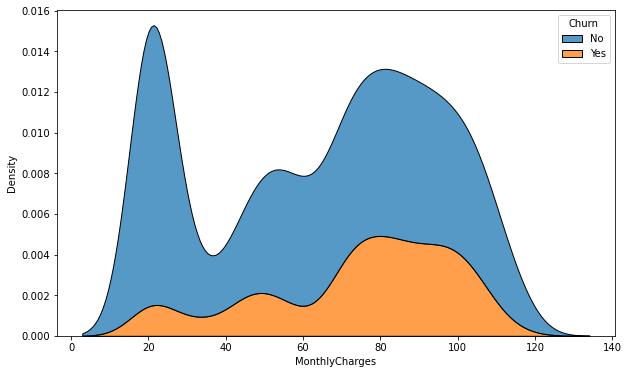

In [60]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = data, x="MonthlyCharges", hue="Churn", multiple="stack")

* We can see churn is high as the monthly charges increase.

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

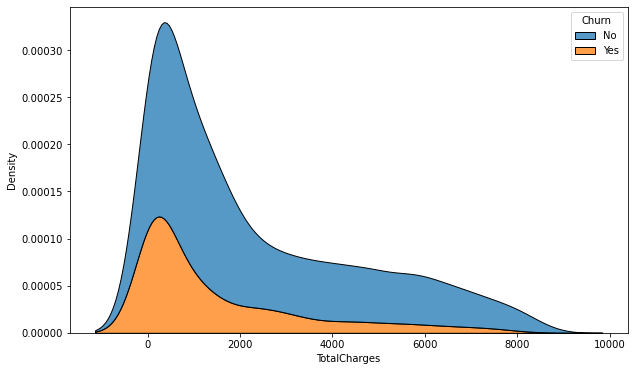

In [61]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = data, x="TotalCharges", hue="Churn", multiple="stack")

* Here we can see a reverse of monthly charges, as the Total charge increse the churning decreases.

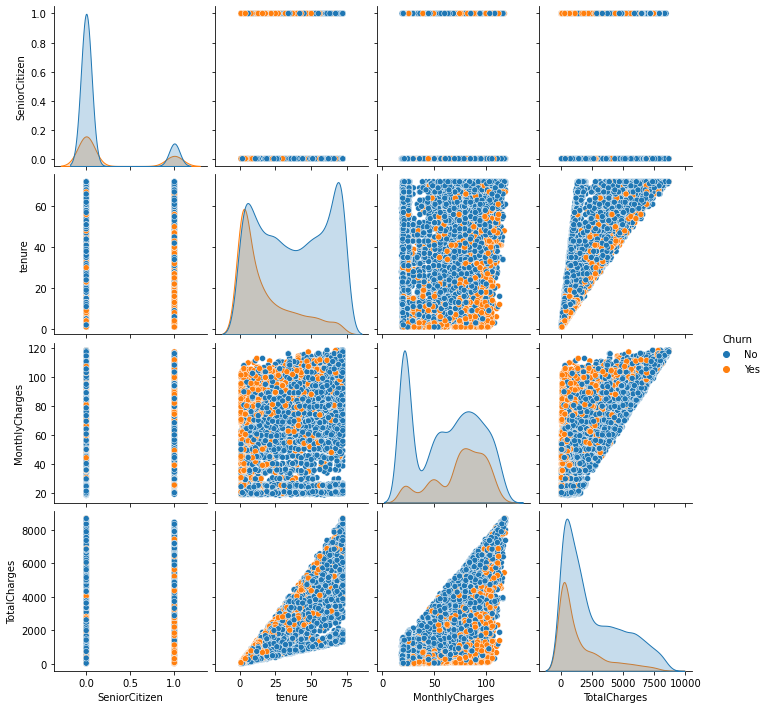

In [62]:
sns.pairplot(data=data, hue='Churn')

* From the pair plot we can predict Senior Citizen are more likely to churn

# Data Preprocessing

In [63]:
feature=data.drop('Churn', axis=1)
target= data['Churn']

In [64]:
data_new= pd.get_dummies(feature,sparse=False, drop_first=True )

In [65]:
data_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [66]:
data_new.shape

(7032, 30)

* After applyign one hot encoder, now our data changes into 7032 rows and 30 columns.

* For Target column lets imort label encoder

In [67]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
Target = le.fit_transform(target)

In [68]:
data_new['Churn']= Target

In [69]:
data_new.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


* Now curn is added to the new dataframe.

Lets check Correlation

In [70]:
data_new.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,-0.001819,0.016957,-0.210550,0.008392,-0.008392,0.142996,0.254923,-0.182519,-0.182519,-0.038576,-0.182519,0.066663,-0.182519,0.059514,-0.182519,-0.060577,-0.182519,0.105445,-0.182519,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,0.005285,0.381912,0.163386,0.007877,-0.007877,0.332399,0.017930,-0.037529,-0.037529,0.328297,-0.037529,0.361138,-0.037529,0.361520,-0.037529,0.325288,-0.037529,0.280264,-0.037529,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,-0.013779,0.097825,-0.112343,0.248033,-0.248033,0.490912,0.787195,-0.763191,-0.763191,0.296447,-0.763191,0.441529,-0.763191,0.482607,-0.763191,0.338301,-0.763191,0.629668,-0.763191,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.000048,0.319072,0.064653,0.113008,-0.113008,0.469042,0.360769,-0.374878,-0.374878,0.412619,-0.374878,0.510100,-0.374878,0.522881,-0.374878,0.432868,-0.374878,0.515709,-0.374878,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708,-0.199484
gender_Male,-0.001819,0.005285,-0.013779,0.000048,1.000000,-0.001379,0.010349,-0.007515,0.007515,-0.008883,-0.011189,0.004745,0.004745,-0.016328,0.004745,-0.013093,0.004745,-0.000807,0.004745,-0.008507,0.004745,-0.007124,0.004745,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199,-0.008545
Partner_Yes,0.016957,0.381912,0.097825,0.319072,-0.001379,1.000000,0.452269,0.018397,-0.018397,0.142561,0.001235,-0.000286,-0.000286,0.143346,-0.000286,0.141849,-0.000286,0.153556,-0.000286,0.120206,-0.000286,0.124483,-0.000286,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948,-0.149982
Dependents_Yes,-0.210550,0.163386,-0.112343,0.064653,0.010349,0.452269,1.000000,-0.001078,0.001078,-0.024307,-0.164101,0.138383,0.138383,0.080786,0.138383,0.023639,0.138383,0.013900,0.138383,0.063053,0.138383,-0.016499,0.138383,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448,-0.163128
PhoneService_Yes,0.008392,0.007877,0.248033,0.113008,-0.007515,0.018397,-0.001078,1.000000,-1.000000,0.279530,0.290183,0.171817,0.171817,-0.091676,0.171817,-0.052133,0.171817,-0.070076,0.171817,-0.095138,0.171817,-0.021383,0.171817,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463,0.011691
MultipleLines_No phone service,-0.008392,-0.007877,-0.248033,-0.113008,0.007515,-0.018397,0.001078,-1.000000,1.000000,-0.279530,-0.290183,-0.171817,-0.171817,0.091676,-0.171817,0.052133,-0.171817,0.070076,-0.171817,0.095138,-0.171817,0.021383,-0.171817,0.033477,0.003142,-0.004442,-0.016696,0.006916,-0.002747,0.004463,-0.011691
MultipleLines_Yes,0.142996,0.332399,0.490912,0.469042,-0.008883,0.142561,-0.024307,0.279530,-0.279530,1.000000,0.366420,-0.210794,-0.210794,0.098592,-0.210794,0.202228,-0.210794,0.201733,-0.210794,0.100421,-0.210794,0.257804,-0.210794,0.259194,-0.003594,0.106618,0.163746,0.060319,0.083583,-0.227672,0.040033


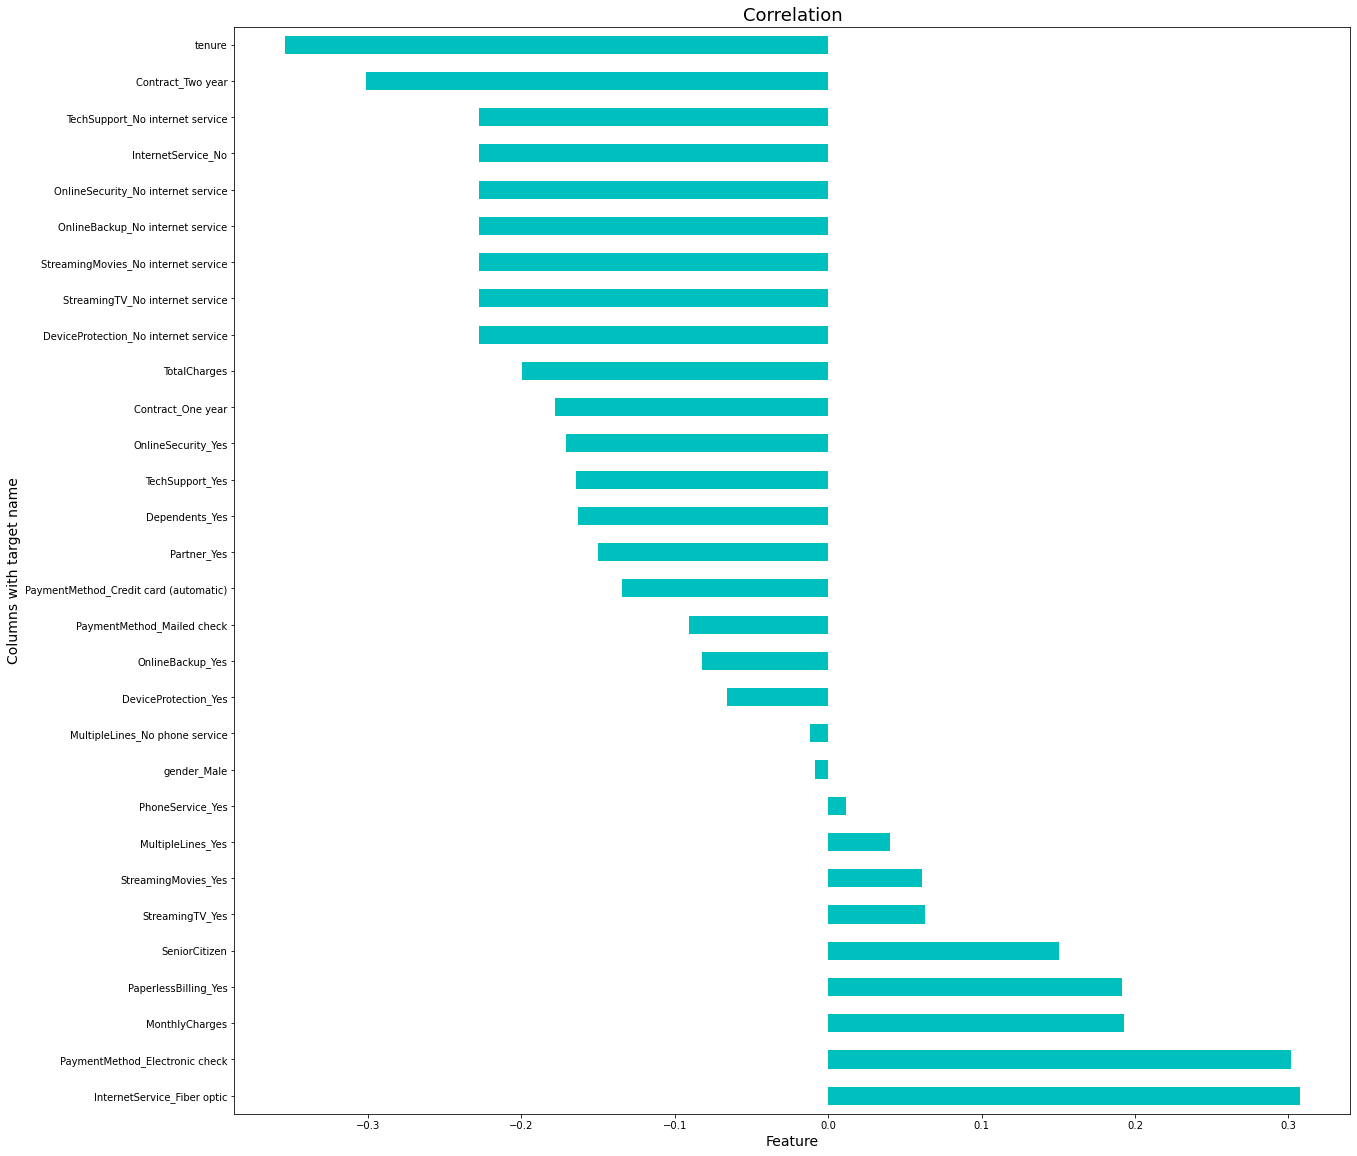

In [71]:
plt.figure(figsize=(20,20))
data_new.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='barh',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

* All the columns on the left of 0.0 are having negative correlation and columns on Right of 0.0 are having positive correlation

# Checking Outliers

<AxesSubplot:>

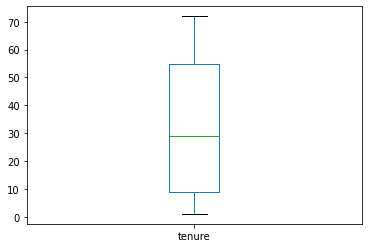

In [72]:
data_new['tenure'].plot.box()

<AxesSubplot:>

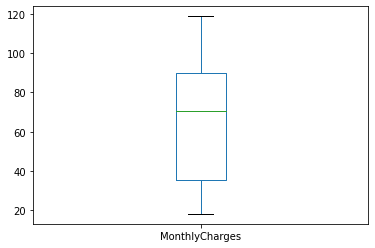

In [73]:
data_new['MonthlyCharges'].plot.box()

<AxesSubplot:>

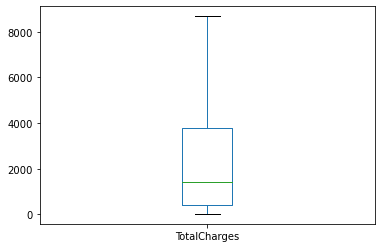

In [74]:
data_new['TotalCharges'].plot.box()

* Here we can see our contineous columns not having any outliers.

# Checking Skewness

Here we will check skewness only for contineous data, not for categorical data.

In [75]:
data.skew()

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

* SeniorCitizen and TotalCharges are aving skewness

# removing Skewness from the data

In [76]:
data_new['TotalCharges'] = np.sqrt( data_new['TotalCharges'] )

# Scaling the data Using StandardScaler.

In [77]:
# Dividing into Feature and Target data
x=data_new.drop(['Churn'],axis=1)
y=data_new['Churn']

In [78]:
from sklearn.preprocessing import StandardScaler
SDC=StandardScaler()
x=SDC.fit_transform(x)

<AxesSubplot:xlabel='Churn', ylabel='count'>

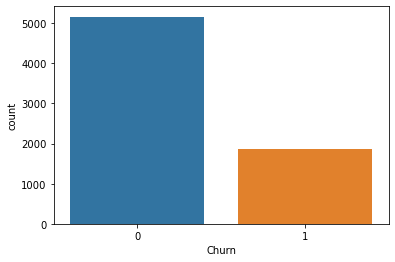

In [79]:
sns.countplot(y)

* Here we can see our output is not balanced we will now use SMOTE to balance the output.

* from imblearn.over_sampling import SMOTE

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
X_train_over, Y_train_over =SMOTE(k_neighbors=3).fit_resample(x,y)

In [82]:
X_train_over.shape

(10326, 30)

In [83]:
Y_train_over.shape

(10326,)

In [84]:
Y_train_over.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [85]:
data_new.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn'],
      dtype='object')

In [86]:
dfx=pd.DataFrame(data=X_train_over, columns=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'])

In [87]:
dfx

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.440327,-1.280248,-1.161694,-1.448158,-1.009430,1.035617,-0.652305,-3.056334,3.056334,-0.854336,-0.886896,-0.525130,-0.525130,-0.633746,-0.525130,1.378330,-0.525130,-0.723918,-0.525130,-0.639260,-0.525130,-0.790186,-0.525130,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604
1,-0.440327,0.064303,-0.260878,0.100539,0.990658,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,-0.886896,-0.525130,-0.525130,1.577918,-0.525130,-0.725516,-0.525130,1.381372,-0.525130,-0.639260,-0.525130,-0.790186,-0.525130,-0.796849,1.943495,-0.561364,-1.206361,-0.525351,-0.711863,1.839576
2,-0.440327,-1.239504,-0.363923,-1.247016,0.990658,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,-0.886896,-0.525130,-0.525130,1.577918,-0.525130,1.378330,-0.525130,-0.723918,-0.525130,-0.639260,-0.525130,-0.790186,-0.525130,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,-0.711863,1.839576
3,-0.440327,0.512486,-0.747850,0.077540,0.990658,-0.965608,-0.652305,-3.056334,3.056334,-0.854336,-0.886896,-0.525130,-0.525130,1.577918,-0.525130,-0.725516,-0.525130,1.381372,-0.525130,1.564308,-0.525130,-0.790186,-0.525130,-0.796849,1.943495,-0.561364,-1.206361,-0.525351,-0.711863,-0.543604
4,-0.440327,-1.239504,0.196178,-1.168976,-1.009430,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,1.127527,-0.525130,-0.525130,-0.633746,-0.525130,-0.725516,-0.525130,-0.723918,-0.525130,-0.639260,-0.525130,-0.790186,-0.525130,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,-0.440327,-1.265214,0.850028,-1.220884,0.990658,-0.227156,1.533025,0.327189,-0.327189,-0.854336,1.127527,-0.525130,-0.525130,-0.633746,-0.525130,-0.725516,-0.525130,-0.723918,-0.525130,-0.639260,-0.525130,1.265525,-0.525130,1.254943,-0.514537,-0.561364,0.828939,-0.525351,0.623729,-0.543604
10322,2.271039,0.790617,1.196321,1.276504,0.990658,1.035617,-0.652305,0.327189,-0.327189,1.170500,1.127527,-0.525130,-0.525130,-0.633746,-0.525130,-0.725516,-0.525130,1.381372,-0.525130,-0.639260,-0.525130,1.265525,-0.525130,1.254943,-0.514537,-0.561364,-0.249087,-0.525351,1.404764,-0.543604
10323,-0.440327,-0.600218,-1.315427,-0.786941,-1.009430,-0.965608,-0.652305,0.327189,-0.327189,1.170500,-0.886896,1.904289,1.904289,-0.633746,1.904289,-0.725516,1.904289,-0.723918,1.904289,-0.639260,1.904289,-0.790186,1.904289,-0.796849,-0.514537,0.068911,0.281375,1.903490,-0.711863,-0.543604
10324,-0.440327,-0.817694,0.333016,-0.409972,-0.577886,-0.965608,-0.652305,0.327189,-0.327189,1.170500,1.127527,-0.525130,-0.525130,-0.633746,-0.525130,-0.725516,-0.525130,-0.723918,-0.525130,-0.639260,-0.525130,-0.790186,-0.525130,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,-0.711863,1.839576


# VIF Calculation

In [88]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [90]:
calc_vif(dfx)

,variables,VIF FACTOR
0,SeniorCitizen,1.170283
1,tenure,18.619449
2,MonthlyCharges,898.882119
3,TotalCharges,23.873820
4,gender_Male,1.004294
5,Partner_Yes,1.503780
6,Dependents_Yes,1.420821
7,PhoneService_Yes,inf
8,MultipleLines_No phone service,inf
9,MultipleLines_Yes,8.043688


In [91]:
dfx.drop(['PhoneService_Yes'],axis=1, inplace= True)

In [92]:
calc_vif(dfx)

,variables,VIF FACTOR
0,SeniorCitizen,1.170283
1,tenure,18.619449
2,MonthlyCharges,898.882119
3,TotalCharges,23.873820
4,gender_Male,1.004294
5,Partner_Yes,1.503780
6,Dependents_Yes,1.420821
7,MultipleLines_No phone service,37.863612
8,MultipleLines_Yes,8.043688
9,InternetService_Fiber optic,172.949934


In [93]:
dfx.drop(['InternetService_No'],axis=1, inplace= True)

In [94]:
calc_vif(dfx)

,variables,VIF FACTOR
0,SeniorCitizen,1.170283
1,tenure,18.619449
2,MonthlyCharges,898.882119
3,TotalCharges,23.873820
4,gender_Male,1.004294
5,Partner_Yes,1.503780
6,Dependents_Yes,1.420821
7,MultipleLines_No phone service,37.863612
8,MultipleLines_Yes,8.043688
9,InternetService_Fiber optic,172.949934


In [95]:
dfx.drop(['OnlineSecurity_No internet service'],axis=1, inplace= True)

In [96]:
calc_vif(dfx)

,variables,VIF FACTOR
0,SeniorCitizen,1.170283
1,tenure,18.619449
2,MonthlyCharges,898.882119
3,TotalCharges,23.873820
4,gender_Male,1.004294
5,Partner_Yes,1.503780
6,Dependents_Yes,1.420821
7,MultipleLines_No phone service,37.863612
8,MultipleLines_Yes,8.043688
9,InternetService_Fiber optic,172.949934


In [97]:
dfx.drop(['OnlineBackup_No internet service'],axis=1, inplace= True)

In [98]:
calc_vif(dfx)

,variables,VIF FACTOR
0,SeniorCitizen,1.170283
1,tenure,18.619449
2,MonthlyCharges,898.882119
3,TotalCharges,23.873820
4,gender_Male,1.004294
5,Partner_Yes,1.503780
6,Dependents_Yes,1.420821
7,MultipleLines_No phone service,37.863612
8,MultipleLines_Yes,8.043688
9,InternetService_Fiber optic,172.949934


In [99]:
dfx.drop(['DeviceProtection_No internet service'],axis=1, inplace= True)

In [100]:
calc_vif(dfx)

,variables,VIF FACTOR
0,SeniorCitizen,1.170283
1,tenure,18.619449
2,MonthlyCharges,898.882119
3,TotalCharges,23.873820
4,gender_Male,1.004294
5,Partner_Yes,1.503780
6,Dependents_Yes,1.420821
7,MultipleLines_No phone service,37.863612
8,MultipleLines_Yes,8.043688
9,InternetService_Fiber optic,172.949934


In [101]:
dfx.drop(['TechSupport_No internet service'],axis=1, inplace= True)

In [102]:
calc_vif(dfx)

,variables,VIF FACTOR
0,SeniorCitizen,1.170283
1,tenure,18.619449
2,MonthlyCharges,898.882119
3,TotalCharges,23.873820
4,gender_Male,1.004294
5,Partner_Yes,1.503780
6,Dependents_Yes,1.420821
7,MultipleLines_No phone service,37.863612
8,MultipleLines_Yes,8.043688
9,InternetService_Fiber optic,172.949934


In [104]:
dfx.drop(['StreamingTV_No internet service'],axis=1, inplace= True)

In [105]:
calc_vif(dfx)

,variables,VIF FACTOR
0,SeniorCitizen,1.170283
1,tenure,18.619449
2,MonthlyCharges,898.882119
3,TotalCharges,23.873820
4,gender_Male,1.004294
5,Partner_Yes,1.503780
6,Dependents_Yes,1.420821
7,MultipleLines_No phone service,37.863612
8,MultipleLines_Yes,8.043688
9,InternetService_Fiber optic,172.949934


In [106]:
dfx.drop(['MonthlyCharges'],axis=1, inplace= True)

In [107]:
calc_vif(dfx)

,variables,VIF FACTOR
0,SeniorCitizen,1.170236
1,tenure,18.604559
2,TotalCharges,23.854231
3,gender_Male,1.003989
4,Partner_Yes,1.503422
5,Dependents_Yes,1.420691
6,MultipleLines_No phone service,1.515276
7,MultipleLines_Yes,1.542438
8,InternetService_Fiber optic,2.657461
9,OnlineSecurity_Yes,1.466774


In [108]:
dfx.drop(['TotalCharges'],axis=1, inplace= True)

In [109]:
calc_vif(dfx)

,variables,VIF FACTOR
0,SeniorCitizen,1.169476
1,tenure,3.146381
2,gender_Male,1.003921
3,Partner_Yes,1.500629
4,Dependents_Yes,1.420559
5,MultipleLines_No phone service,1.402242
6,MultipleLines_Yes,1.460526
7,InternetService_Fiber optic,2.243146
8,OnlineSecurity_Yes,1.393922
9,OnlineBackup_Yes,1.332517


* As we can see VIF is less than 10 we will not remove any columns, and proceed further.

In [110]:
dfx

,SeniorCitizen,tenure,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.440327,-1.280248,-1.009430,1.035617,-0.652305,3.056334,-0.854336,-0.886896,-0.633746,1.378330,-0.723918,-0.639260,-0.790186,-0.525130,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604
1,-0.440327,0.064303,0.990658,-0.965608,-0.652305,-0.327189,-0.854336,-0.886896,1.577918,-0.725516,1.381372,-0.639260,-0.790186,-0.525130,-0.796849,1.943495,-0.561364,-1.206361,-0.525351,-0.711863,1.839576
2,-0.440327,-1.239504,0.990658,-0.965608,-0.652305,-0.327189,-0.854336,-0.886896,1.577918,1.378330,-0.723918,-0.639260,-0.790186,-0.525130,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,-0.711863,1.839576
3,-0.440327,0.512486,0.990658,-0.965608,-0.652305,3.056334,-0.854336,-0.886896,1.577918,-0.725516,1.381372,1.564308,-0.790186,-0.525130,-0.796849,1.943495,-0.561364,-1.206361,-0.525351,-0.711863,-0.543604
4,-0.440327,-1.239504,-1.009430,-0.965608,-0.652305,-0.327189,-0.854336,1.127527,-0.633746,-0.725516,-0.723918,-0.639260,-0.790186,-0.525130,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,-0.440327,-1.265214,0.990658,-0.227156,1.533025,-0.327189,-0.854336,1.127527,-0.633746,-0.725516,-0.723918,-0.639260,1.265525,-0.525130,1.254943,-0.514537,-0.561364,0.828939,-0.525351,0.623729,-0.543604
10322,2.271039,0.790617,0.990658,1.035617,-0.652305,-0.327189,1.170500,1.127527,-0.633746,-0.725516,1.381372,-0.639260,1.265525,-0.525130,1.254943,-0.514537,-0.561364,-0.249087,-0.525351,1.404764,-0.543604
10323,-0.440327,-0.600218,-1.009430,-0.965608,-0.652305,-0.327189,1.170500,-0.886896,-0.633746,-0.725516,-0.723918,-0.639260,-0.790186,1.904289,-0.796849,-0.514537,0.068911,0.281375,1.903490,-0.711863,-0.543604
10324,-0.440327,-0.817694,-0.577886,-0.965608,-0.652305,-0.327189,1.170500,1.127527,-0.633746,-0.725516,-0.723918,-0.639260,-0.790186,-0.525130,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,-0.711863,1.839576


In [111]:
x=dfx
y=Y_train_over

# Model Design

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Chosing Best Random State

In [113]:
lr= LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= i, test_size= 0.20)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",accuracy_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", accuracy_score(y_test,pred_test)*100)

At Random state  18 The Model performing Well
At Random State 18
Training Accuracy score is- 77.32445520581113
Testing Accuracy Score is- 77.34753146176186
At Random state  43 The Model performing Well
At Random State 43
Training Accuracy score is- 77.3365617433414
Testing Accuracy Score is- 77.25072604065828
At Random state  84 The Model performing Well
At Random State 84
Training Accuracy score is- 77.31234866828088
Testing Accuracy Score is- 77.29912875121006
At Random state  109 The Model performing Well
At Random State 109
Training Accuracy score is- 77.3365617433414
Testing Accuracy Score is- 77.34753146176186
At Random state  115 The Model performing Well
At Random State 115
Training Accuracy score is- 77.26392251815982
Testing Accuracy Score is- 77.34753146176186
At Random state  152 The Model performing Well
At Random State 152
Training Accuracy score is- 77.3365617433414
Testing Accuracy Score is- 77.29912875121006
At Random state  166 The Model performing Well
At Random Stat

At Random state  971 The Model performing Well
At Random State 971
Training Accuracy score is- 77.3002421307506
Testing Accuracy Score is- 77.34753146176186


* At Random State 653

* Training Accuracy score is- 77.31234866828088

* Testing Accuracy Score is- 77.29912875121006

In [114]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y,random_state=653,test_size=0.20)

In [115]:
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(accuracy_score(y_test_b,lr_pred))

0.7802516940948693


In [116]:
from sklearn.metrics import classification_report 
print(confusion_matrix(y_test_b, lr_pred))
print(classification_report(y_test_b, lr_pred))

[[774 240]
 [214 838]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1014
           1       0.78      0.80      0.79      1052

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



# Cross validation of model.

In [117]:
lr_pred=lr.predict(x_test_b)
from sklearn.model_selection import cross_val_score
lr_score=accuracy_score(y_test_b,lr_pred)
for j in range(2,10):
    lr_cv= cross_val_score(lr,x,y,cv=j)
    lr_cvscore=lr_cv.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lr_cvscore*100)
    print("Accuracy Score:-", lr_score*100)
    print("\n")
    

at cv:- 2
Cross Validation scre is:- 77.22254503195816
Accuracy Score:- 78.02516940948692


at cv:- 3
Cross Validation scre is:- 77.26128220027117
Accuracy Score:- 78.02516940948692


at cv:- 4
Cross Validation scre is:- 77.21296680052735
Accuracy Score:- 78.02516940948692


at cv:- 5
Cross Validation scre is:- 77.05790745589258
Accuracy Score:- 78.02516940948692


at cv:- 6
Cross Validation scre is:- 77.14507069533218
Accuracy Score:- 78.02516940948692


at cv:- 7
Cross Validation scre is:- 77.2321568009869
Accuracy Score:- 78.02516940948692


at cv:- 8
Cross Validation scre is:- 77.18395540984395
Accuracy Score:- 78.02516940948692


at cv:- 9
Cross Validation scre is:- 77.13564413013665
Accuracy Score:- 78.02516940948692




at cv:- 7

Cross Validation scre is:- 77.03851125678327

Accuracy Score:- 77.29912875121006

At cv:7 Cross val score and Accuracy Score are having very less diffrence, Over model is perfoming well.

# SVC

In [119]:
svc=SVC()
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=7, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 82.09099709583737
Cross val Score : 81.2031076727232


In [120]:
print(confusion_matrix(y_test_b, svc_pred))
print(classification_report(y_test_b, svc_pred))

[[786 228]
 [142 910]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1014
           1       0.80      0.87      0.83      1052

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



Accuracy_core: 81.41335914811229
    
Cross val Score : 81.22247157096268
    
Both score having good Accuracy. Model perfoming well. Lets try another model.

# Ensemble Techniques

KNeighborsClassifier

In [121]:
kn=KNeighborsClassifier()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=7, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 79.42884801548887
Cross val Score : 78.99501958699975


In [122]:
print(confusion_matrix(y_test_b, kn_pred))
print(classification_report(y_test_b, kn_pred))

[[693 321]
 [104 948]]
              precision    recall  f1-score   support

           0       0.87      0.68      0.77      1014
           1       0.75      0.90      0.82      1052

    accuracy                           0.79      2066
   macro avg       0.81      0.79      0.79      2066
weighted avg       0.81      0.79      0.79      2066



# DecisionTreeClassifier

In [123]:
dt=DecisionTreeClassifier()
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=7, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 79.28363988383349
Cross val score is: 78.67601724443395


In [124]:
print(confusion_matrix(y_test_b, dt_pred))
print(classification_report(y_test_b, dt_pred))

[[803 211]
 [217 835]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1014
           1       0.80      0.79      0.80      1052

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



# RandomForestClassifier

In [125]:
rf=RandomForestClassifier()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=7, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  84.12391093901257
Cross val Score : 85.47435973149078


In [126]:
print(confusion_matrix(y_test_b, rf_pred))
print(classification_report(y_test_b, rf_pred))

[[851 163]
 [165 887]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1014
           1       0.84      0.84      0.84      1052

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



# AdaBoostClassifier

In [127]:
ad=AdaBoostClassifier()
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=7, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  80.44530493707647
Cross val Score : 80.19590280648569


In [128]:
print(confusion_matrix(y_test_b, ad_pred))
print(classification_report(y_test_b, ad_pred))

[[775 239]
 [165 887]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1014
           1       0.79      0.84      0.81      1052

    accuracy                           0.80      2066
   macro avg       0.81      0.80      0.80      2066
weighted avg       0.81      0.80      0.80      2066



# GaussianNB

In [129]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b, y_train_b)
gb_pred=gb.predict(x_test_b)

gb_score=accuracy_score(y_test_b, gb_pred)
print("Accuracy Score is:", gb_score*100)

gb_cv= cross_val_score(gb, x,y,cv=7, scoring='accuracy')
gb_cvscore=gb_cv.mean()
print("Cross Val Score is :", gb_cvscore*100)

Accuracy Score is: 77.25072604065828
Cross Val Score is : 76.34125343674744


In [130]:
print(confusion_matrix(y_test_b, gb_pred))
print(classification_report(y_test_b, gb_pred))


[[735 279]
 [191 861]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.76      1014
           1       0.76      0.82      0.79      1052

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



* Model score is less as compare to SVC, SVC is still best model.

# Hyperparameter Tuning of the model.

In [131]:
from sklearn.model_selection import GridSearchCV

In [133]:
from sklearn.ensemble import AdaBoostClassifier
parameters={'n_estimators':[20,30,40,50,100,150],'learning_rate':[0.0001,0.001,0.01],'algorithm':['SAMME', 'SAMME.R'],'random_state':[10,20,30,40,50,75]}
ad=AdaBoostClassifier()
adclf=GridSearchCV(ad, param_grid=parameters, n_jobs=-1)
adclf.fit(x_train_b, y_train_b)
print(adclf.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 150, 'random_state': 10}


In [134]:
ad=AdaBoostClassifier(algorithm='SAMME.R', learning_rate= 0.01, n_estimators= 150, random_state=10)
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=7, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  76.37947725072604
Cross val Score : 75.08243600595812


In [135]:
scv=SVC(C=2.5,decision_function_shape='ovo', gamma='scale', kernel='rbf', random_state=0)
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=7, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 82.09099709583737
Cross val Score : 81.2031076727232


* SVC with Accuracy_core: 81.41335914811229 Cross val Score : 81.22247157096268 is our best model.

# AUC ROC Curve:

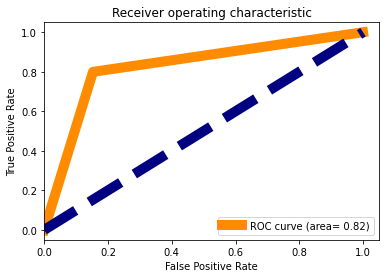

In [136]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(svc_pred, y_test_b)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=10,label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw=10, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Saving Best Model

In [137]:
import pickle
filename="Evaluation_Project_Customer_Churn_Analysis.pkl "
pickle.dump(svc, open(filename,'wb'))

In [138]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(svc.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
2061,0,0
2062,0,0
2063,1,1
2064,0,0
